# Clusterização - Agrupamento

Problema: Um shopping quer melhorar o atendimento dos seus clientes com base nas preferências de compras deles. 
Para tal, irá ser realizado o agrupamento dos clientes de acordo com o perfil de compra dos mesmos para compreender o perfil de compra.

In [1]:
#Importando as bibliotecas necessárias:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
caminho = '/content/base_cluster.csv'
df = pd.read_csv(caminho)
df

,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Year_Birth,Income
0,5524,635,88,546,172,88,88,1957,58138.0
1,2174,11,1,6,2,1,6,1954,46344.0
2,4141,426,49,127,111,21,42,1965,71613.0
3,6182,11,4,20,10,3,5,1984,26646.0
4,5324,173,43,118,46,27,15,1981,58293.0
...,...,...,...,...,...,...,...,...,...
2235,10870,709,43,182,42,118,247,1967,61223.0
2236,4001,406,0,30,0,0,8,1946,64014.0
2237,7270,908,48,217,32,12,24,1981,56981.0
2238,8235,428,30,214,80,30,61,1956,69245.0


In [3]:
df.set_index('ID')

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Year_Birth,Income
ID,,,,,,,,
5524,635,88,546,172,88,88,1957,58138.0
2174,11,1,6,2,1,6,1954,46344.0
4141,426,49,127,111,21,42,1965,71613.0
6182,11,4,20,10,3,5,1984,26646.0
5324,173,43,118,46,27,15,1981,58293.0
...,...,...,...,...,...,...,...,...
10870,709,43,182,42,118,247,1967,61223.0
4001,406,0,30,0,0,8,1946,64014.0
7270,908,48,217,32,12,24,1981,56981.0


In [5]:
#Agrupando de acordo com o perfil de compras dos clientes:

df2 = df.set_index('ID').filter(regex='Mnt',axis = 1)
df2

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
ID,,,,,,
5524,635,88,546,172,88,88
2174,11,1,6,2,1,6
4141,426,49,127,111,21,42
6182,11,4,20,10,3,5
5324,173,43,118,46,27,15
...,...,...,...,...,...,...
10870,709,43,182,42,118,247
4001,406,0,30,0,0,8
7270,908,48,217,32,12,24


In [6]:
# Somando o valor contido nas linhas:

df2.sum(axis = 1)

ID
5524     1617
2174       27
4141      776
6182       53
5324      422
         ... 
10870    1341
4001      444
7270     1241
8235      843
9405      172
Length: 2240, dtype: int64

In [9]:
# Cálculo da porcentagem de cada produto relacionada a cada cliente:

df3 = df2.divide(df2.sum(axis=1),axis='index')
df3

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
ID,,,,,,
5524,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422
2174,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222
4141,0.548969,0.063144,0.163660,0.143041,0.027062,0.054124
6182,0.207547,0.075472,0.377358,0.188679,0.056604,0.094340
5324,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545
...,...,...,...,...,...,...
10870,0.528710,0.032066,0.135720,0.031320,0.087994,0.184191
4001,0.914414,0.000000,0.067568,0.000000,0.000000,0.018018
7270,0.731668,0.038678,0.174859,0.025786,0.009670,0.019339


A seguir, será feita a clusterização dos clientes, em que se optou por 4 categorias.

In [10]:
#Fazendo a clusterização dos clientes de acordo com o perfil de compra:

from sklearn.cluster import KMeans
km=KMeans(n_clusters=4)
km.fit(df3)

KMeans(n_clusters=4)

In [11]:
clus = km.predict(df3)
clus

array([1, 0, 0, ..., 2, 0, 0], dtype=int32)

In [13]:
#Contabilizando a quantidade de clientes por cluster:

np.unique(clus, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([727, 529, 606, 378]))

In [14]:
#Adicionando a coluna de cluster a qual o cliente pertence:

df3.loc[:,'cluster'] = clus
df3

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,cluster
ID,,,,,,,
5524,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422,1
2174,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222,0
4141,0.548969,0.063144,0.163660,0.143041,0.027062,0.054124,0
6182,0.207547,0.075472,0.377358,0.188679,0.056604,0.094340,1
5324,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545,0
...,...,...,...,...,...,...,...
10870,0.528710,0.032066,0.135720,0.031320,0.087994,0.184191,0
4001,0.914414,0.000000,0.067568,0.000000,0.000000,0.018018,2
7270,0.731668,0.038678,0.174859,0.025786,0.009670,0.019339,2


In [16]:
#Fazendo a média de compras por categoria de acordo com cada cluster:
df3.groupby('cluster').mean()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
cluster,,,,,,
0,0.498326,0.041543,0.246986,0.061169,0.043877,0.108100
1,0.301681,0.059813,0.409893,0.085519,0.057923,0.085170
2,0.744348,0.014522,0.141953,0.019448,0.014014,0.065716
3,0.142992,0.106475,0.202335,0.155391,0.112987,0.279820


In [17]:
aux = df3.groupby('cluster').mean()
aux

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
cluster,,,,,,
0,0.498326,0.041543,0.246986,0.061169,0.043877,0.108100
1,0.301681,0.059813,0.409893,0.085519,0.057923,0.085170
2,0.744348,0.014522,0.141953,0.019448,0.014014,0.065716
3,0.142992,0.106475,0.202335,0.155391,0.112987,0.279820


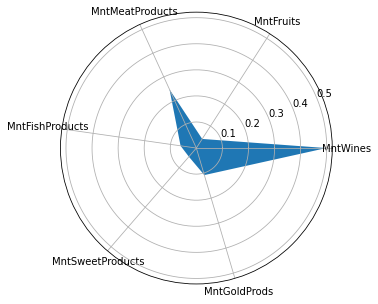

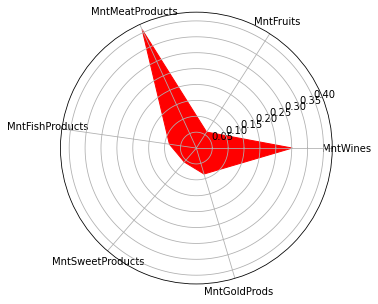

In [20]:
#Plotando os gráficos da tabela acima para melhor visualização dos dados:

plt.figure(figsize=(15,5))
plt.subplot(1,1,1,projection='polar')
plt.fill(aux.loc[0])

plt.figure(figsize=(15,5))
plt.subplot(1,1,1,projection='polar')
plt.fill(aux.loc[1], color = 'r')

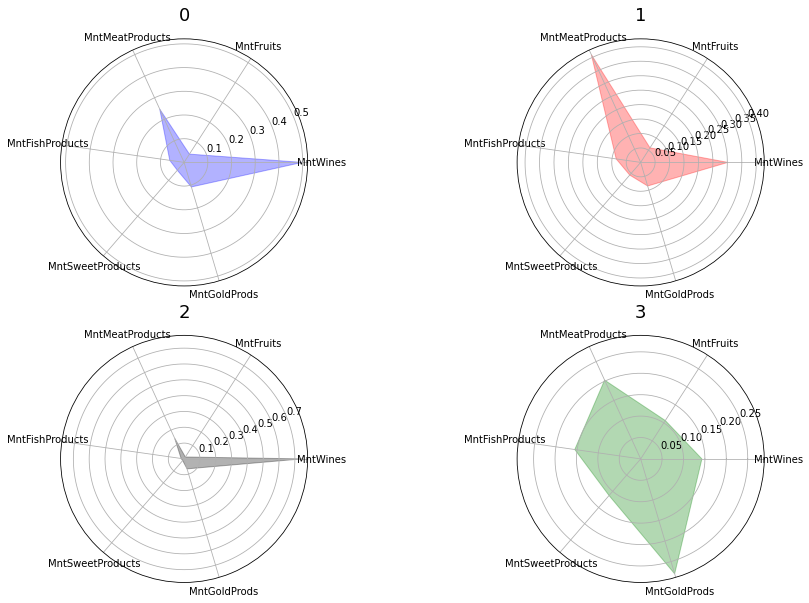

In [23]:
plt.figure(figsize=(15,2*5))
color = ['b','r','k','g']
for cl in aux.index:
    plt.subplot(2,2,cl+1, projection ='polar')
    plt.fill(aux.loc[cl], color = color[cl], alpha = 0.3)
    plt.title(cl,fontsize=18)

Analisando os gráficos acima, nota-se que o cluster 0 tem um perfil de comprar mais vinhos (50 %) e carnes (25%). O cluster 1 compra mais carnes (40 %) e vinhos (25 %). O cluster 2 compra quase que em sua totalidade vinhos (70 %) e o cluster 3 é o mais equilibrado, pois apresenta compras bem distribuídas nas categorias jóias (25%), carnes (15 %), doces (10 %), vinhos (10%), peixes (10 %) e produtos de feira (10%). 

In [24]:
df.loc[:,'cluster']=clus
df

,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Year_Birth,Income,cluster
0,5524,635,88,546,172,88,88,1957,58138.0,1
1,2174,11,1,6,2,1,6,1954,46344.0,0
2,4141,426,49,127,111,21,42,1965,71613.0,0
3,6182,11,4,20,10,3,5,1984,26646.0,1
4,5324,173,43,118,46,27,15,1981,58293.0,0
...,...,...,...,...,...,...,...,...,...,...
2235,10870,709,43,182,42,118,247,1967,61223.0,0
2236,4001,406,0,30,0,0,8,1946,64014.0,2
2237,7270,908,48,217,32,12,24,1981,56981.0,2
2238,8235,428,30,214,80,30,61,1956,69245.0,0


In [25]:
#Cálculo da média de ano de nascimento de cada cluster:

df.groupby('cluster').Year_Birth.mean()

cluster
0    1967.763411
1    1970.937618
2    1965.064356
3    1973.825397
Name: Year_Birth, dtype: float64

Relacionando o valor do ano de nascimento com o perfil de cada comprador, nota-se que as pessoas que compram de maneira mais uniforme os produtos são os mais jovens (cluster 3). Já os grupos com mais idade, optam por comprar mais vinhos (clusters 0 e 2). 

In [26]:
#Cálculo da média de renda por cluster:

df.groupby('cluster').Income.mean()

cluster
0    55844.881616
1    57671.922929
2    55677.612957
3    32449.954907
Name: Income, dtype: float64

Por fim, tem-se que a menor renda está associada ao grupo mais jovem, que possui um perfil de comprar itens de todas as categorias de maneira mais equitativa.
Já os perfis com renda mais alta, perfis de pessoas mais velhas, compram muito vinho (clusters 0, 1 e 2). Provavelmente isso possa estar relacionado ao preço dos vinhos que costumam ser mais elevados do que os demais produtos analisados. Assim, pessoas com maior poder aquisitivo podem dispender maior quantidade de dinheiro com vinhos, enquanto que pessoas com menor poder aquisitivo não possam comprometer sua renda com produtos tão caros quanto o vinho.